# Tutorial for simple supervised classification learning

This tutorial is a simple walkthrough of supervised classification learning using the famous Iris flower dataset.

Goal: 
* Exploratory data analysis
* Fit logistic and svm clustering algorithim
* Optimize


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import datasets 

In [3]:
# Load dataset
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [4]:
# Create Dataframes
iris_df = pd.DataFrame(features)
target_df = pd.Series(target)

In [5]:
target_df= target_df.map({k:v for (k,v) in enumerate(iris.target_names)})

In [6]:
iris_df = pd.concat([iris_df, target_df], axis = 1, ignore_index = True)

In [7]:
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [8]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Explore Data

In [9]:
iris_df['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

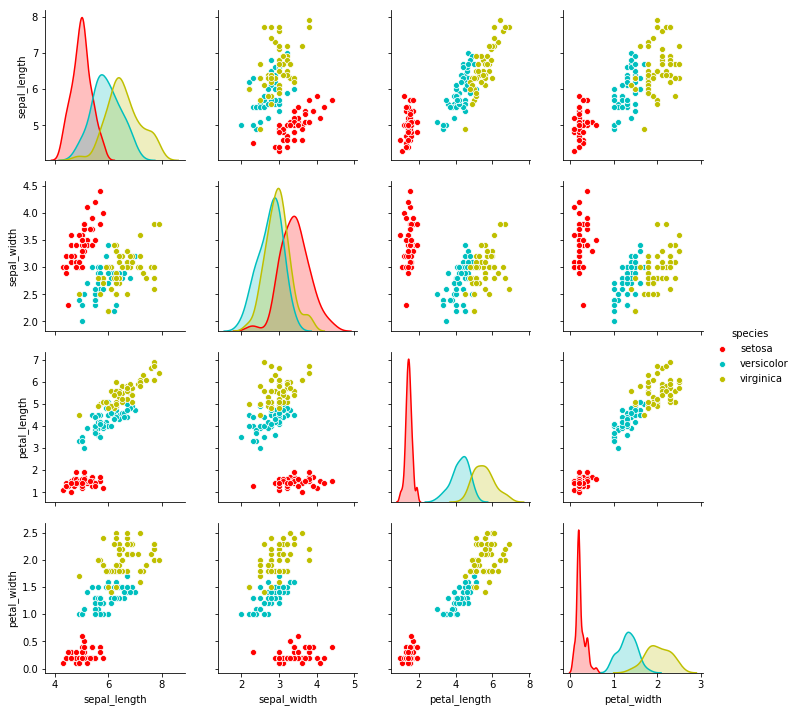

In [10]:
sns.pairplot(iris_df, hue = 'species', palette=["r", "c", "y"])

Setosa is easy to separate. Veriscolor and virginica have overlapping distributions

### Maximize class seperability with dimension reduction. 


Compare LDA and PCA and plot results to visualize

In [11]:
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [12]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [13]:
lda = LinearDiscriminantAnalysis(n_components=None)

In [14]:
features_lda = lda.fit(X_train, y_train)

In [15]:
lda_var_ratios = lda.explained_variance_ratio_

In [16]:
lda_var_ratios

array([0.99229795, 0.00770205])

In [17]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [18]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [19]:
features_lda = lda.fit(X_train, y_train).transform(X_train)

In [20]:
iris_lda_df = pd.DataFrame(features_lda)
iris_lda_df = pd.concat([iris_lda_df, pd.DataFrame(y_train)], axis = 1, ignore_index = True)

In [21]:
iris_lda_df.columns = ['lda_1', 'lda_2', 'species']

In [22]:
iris_lda_df.head()

,lda_1,lda_2,species
0,-8.911102,0.802091,0
1,-9.525179,2.563805,0
2,1.380277,-0.000011,1
3,-7.303022,-0.097825,0
4,-7.334804,-0.266847,0


In [23]:
iris_lda_df['species'] = iris_lda_df['species'].map({k:v for (k,v) in enumerate(iris.target_names)})

In [24]:
iris_lda_df.head()

,lda_1,lda_2,species
0,-8.911102,0.802091,setosa
1,-9.525179,2.563805,setosa
2,1.380277,-0.000011,versicolor
3,-7.303022,-0.097825,setosa
4,-7.334804,-0.266847,setosa


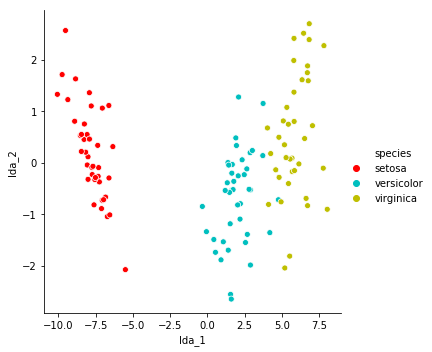

In [25]:
sns.relplot(x='lda_1', y='lda_2', hue='species', data = iris_lda_df,  palette=["r", "c", "y"])

### Good seperation. Now lets compare to PCA

In [26]:
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

In [159]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [160]:
pca = PCA(n_components=2)

In [161]:
features_pca = pca.fit(X_train).transform(X_train)

In [162]:
iris_pca_df = pd.concat([pd.DataFrame(features_pca), pd.DataFrame(y_train)], axis = 1, ignore_index = True)

In [163]:
iris_pca_df.columns = ['pca_1', 'pca_2', 'colors']

In [164]:
iris_pca_df['species'] = iris_pca_df['colors'].map({k:v for (k,v) in enumerate(iris.target_names)})

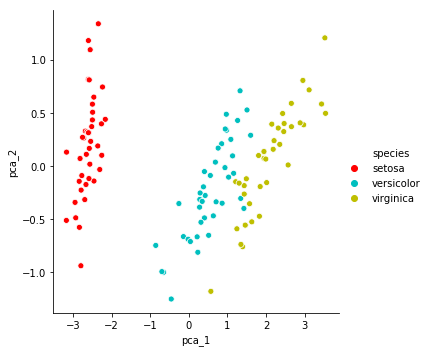

In [165]:
sns.relplot(x='pca_1', y='pca_2', hue='species', data = iris_pca_df,  palette=["r", "c", "y"])

##### How many principle components? 

### Use SVM to classify

In [166]:
from sklearn.svm import SVC # support vector classification

In [167]:
C = 1.0
clf = SVC(kernel='linear', C=C)

In [168]:
model = clf.fit(iris_pca_df[['pca_1', 'pca_2']], y_train)

In [169]:
def plot_svcs(colors):
    for i in range(3):
        w = clf.coef_[i]
        a = -w[0]/w[1]
        xx = np.linspace(-3, 3)
        yy = a * xx - (clf.intercept_[i])/w[1]
        plt.plot(xx,yy, colors[i])

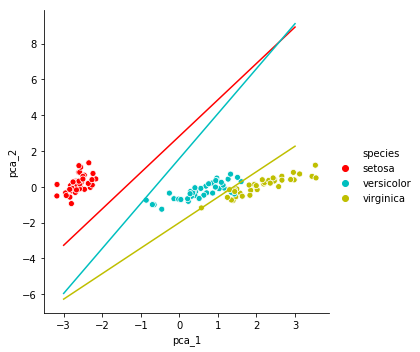

In [170]:
colors = ["r", "c", "y"]
sns.relplot(x='pca_1', y='pca_2', hue='species', data = iris_pca_df,  palette=colors)
plot_svcs(colors)

In [171]:
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in
    
    Parameters:
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional
    
    """
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    return xx, yy

In [172]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifer
    Parameters:
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [173]:
xx, yy = make_meshgrid(iris_pca_df["pca_1"], iris_pca_df["pca_2"])

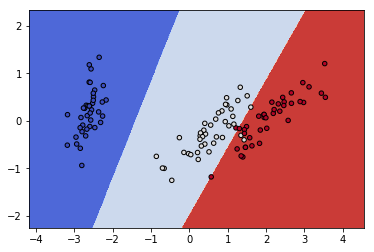

In [174]:
fig, axs = plt.subplots()
plot_contours(axs, clf, xx, yy, cmap=plt.cm.coolwarm)
axs.scatter(iris_pca_df["pca_1"], 
            iris_pca_df["pca_2"], 
            c=iris_pca_df["colors"],
            cmap=plt.cm.coolwarm, 
            s=20, 
            edgecolors='k'
           )
plt.show()

In [141]:
iris_pca_df[iris_pca_df["species"]=="setosa"]["pca_1"]

0     -3.171916
1     -2.347458
3     -2.567534
4     -2.950888
7     -2.518513
8     -2.685025
9     -2.607346
13    -2.582487
14    -2.464404
23    -2.640235
26    -2.595446
27    -2.726331
28    -2.166584
31    -2.310132
32    -2.460218
33    -2.258219
35    -2.545567
38    -2.793243
41    -2.558621
48    -2.239285
51    -2.658422
52    -2.821155
55    -2.590809
57    -2.581490
58    -2.362050
66    -2.838484
67    -3.176302
70    -2.698575
71    -2.604609
72    -2.933152
75    -2.775352
78    -2.843121
84    -2.495238
91    -2.799530
94    -2.500326
98    -2.500917
102   -2.756574
104   -2.667741
114   -2.266200
117   -2.604720
Name: pca_1, dtype: float64